
Loading file 4 ... "Rat 58.Rec 26.Rbound.mat" with size (1040000, 6)

Rat 58.Rec 26.Rbound.mat has 220 good spikes with length of 56


Loading file 7 ... "Rat 59.Rec 12.Lbound.mat" with size (1660000, 6)

Rat 59.Rec 12.Lbound.mat has 61 good spikes with length of 59


Loading file 11 ... "Rat 59.Rec 09.Rbound.mat" with size (1540000, 6)

Rat 59.Rec 09.Rbound.mat has 89 good spikes with length of 51


Loading file 8 ... "Rat 59.Rec 32.Lbound.mat" with size (2060000, 6)

Rat 59.Rec 32.Lbound.mat has 230 good spikes with length of 63

(49, 600)
(600,)


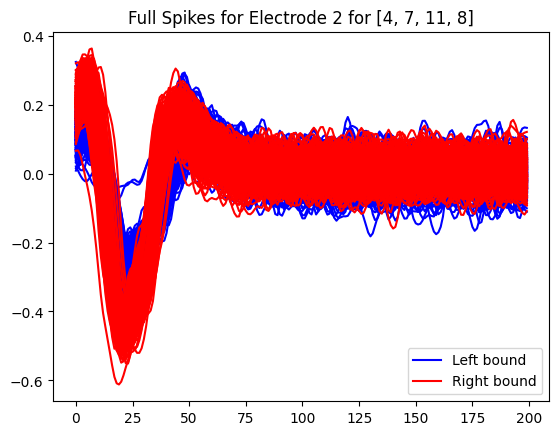

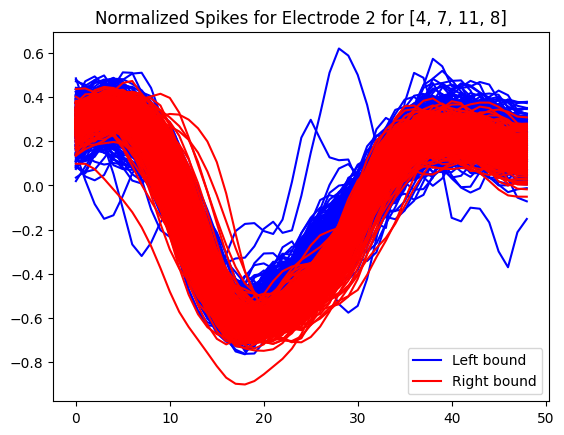

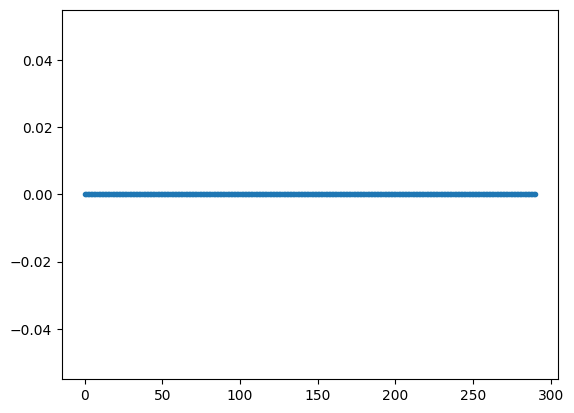

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
# import tkinter
import my_utilities as mu
from spike_manipulator import Spikes

# Controls
ei          = 2                     # electrode index
norm_spks   = 1                     # normalize spikes? 0='no', 1='yes'
fnums       = [4, 7, 11, 8]         # file number to load
# fnums       = [1, 3]              # file number to load
# norm_len    = 199                 # normalized spike lengths
norm_len    = 49                    # normalized spike lengths
stim_mode   = "all"                 # stimulus edge used to keep neural signals = "rise", "fall", or "all"
save_dat    = 1
smallest_num_spikes = 60

# Constants
dat_dir     = 'Data/Raw/'           # directory where .mat neural data files are located
sig_colors  = ['g', 'b', 'y', 'r', 'm']

# main
num_files = len(fnums)
X_good = []
X = []
y = []

for fnum in fnums:
    raw, fname = mu.load_raw(dat_dir, fnum, 0)
    spks = Spikes(raw, stim_mode, 0)
    spks_good = spks.to_good_spikes(ei)
    if norm_spks:
        spks_norm = spks.normalize(spks_good, norm_len)
    else:
        spks_norm = spks.normalize_amplitude_only(spks_good[:100,:])        
        #spks_norm = spks_good[:100,:]
    spks_len = spks.spks_len
    n_spks = spks.num_good_spks

    ones_arr = np.ones(n_spks).astype('int')
    labels = mu.get_label(fname) * ones_arr

    # labels = labels[:smallest_num_spikes]
    # spks_good = spks_good[:,:smallest_num_spikes]
    # spks_norm = spks_norm[:,:smallest_num_spikes]
    

    if fnum == fnums[0]:
        X_good = np.array(spks_good)
        X = np.array(spks_norm)
        y = labels
    else:
        X_good = np.append(X_good, spks_good, axis=1)
        X = np.append(X, spks_norm, axis=1)
        y = np.append(y, labels)
    
    print(f'{fname} has {n_spks} good spikes with length of {spks_len}\n')

print(X.shape)
print(y.shape)

# plotting
lb_indexes = y==0
rb_indexes = y==1

# plot spikes (not normalized)
plt.figure()
plt.plot(X_good[:, lb_indexes][:, 0], 'b', label='Left bound')
plt.plot(X_good[:, rb_indexes][:, 0], 'r', label='Right bound')

plt.plot(X_good[:, lb_indexes][:, 1:], 'b')
plt.plot(X_good[:, rb_indexes][:, 1:], 'r')

plt.legend(loc='lower right')
plt.title(f'Full Spikes for Electrode {ei} for {fnums}')

# plot normalized spikes
plt.figure()
plt.plot(X[:, lb_indexes][:, 0], 'b', label='Left bound')
plt.plot(X[:, rb_indexes][:, 0], 'r', label='Right bound')

plt.plot(X[:, lb_indexes][:, 1:], 'b')
plt.plot(X[:, rb_indexes][:, 1:], 'r')

plt.legend(loc='lower right')
plt.title(f'Normalized Spikes for Electrode {ei} for {fnums}')


plt.figure()
plt.plot(y[lb_indexes], '.')

# # plotting
# plt.figure()
# plt.plot(X, 'k')
# plt.title(f'Electrode {ei} for {fnums}')
# plt.figure()
# plt.plot(y, '.')

if save_dat:
    X = X.T
    np.save('X.npy', X)
    np.save('y.npy', y)    



In [2]:
print(X.shape)
print(y.shape)
print(X)
print(y)


(600, 49)
(600,)
[[0.27627888 0.30286908 0.31066369 ... 0.15918442 0.13433158 0.13106031]
 [0.23945154 0.29309261 0.3388656  ... 0.17611017 0.18270515 0.18378281]
 [0.28544377 0.29878529 0.30365136 ... 0.11945457 0.10678433 0.10489275]
 ...
 [0.44197724 0.43866891 0.41534718 ... 0.32555918 0.27419466 0.26257607]
 [0.07393694 0.14446652 0.21435374 ... 0.3562647  0.27477442 0.25333794]
 [0.3525813  0.34284687 0.36752225 ... 0.14659325 0.07966224 0.06635087]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0

In [3]:
[[], X.shape[0], X.shape[1]]

[[], 600, 49]

In [4]:
X[0]

array([ 0.27627888,  0.30286908,  0.31066369,  0.31870775,  0.33448734,
        0.35521737,  0.38137347,  0.40196298,  0.37821632,  0.29858152,
        0.19239928,  0.09147476, -0.00191212, -0.1133595 , -0.23949705,
       -0.35038005, -0.43946742, -0.50463866, -0.52769731, -0.51913812,
       -0.52099071, -0.54551627, -0.57757013, -0.59803702, -0.59753975,
       -0.56335836, -0.50297267, -0.42685069, -0.33697538, -0.23672227,
       -0.14485394, -0.07961876, -0.02730341,  0.02683596,  0.08425249,
        0.1424395 ,  0.20473261,  0.24616372,  0.2536878 ,  0.24770966,
        0.24717231,  0.25427186,  0.25695875,  0.23973418,  0.21258157,
        0.18696779,  0.15918442,  0.13433158,  0.13106031])